In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다.
reverse_word_index = dict(
    # 정수 인덱스와 단어를 매핑하도록 뒤집습니다.
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    # 리뷰를 디코딩합니다. 0, 1, 2는 ‘패딩’, ‘문서 시작’, ‘사전에 없음’을 위한 인덱스이므로 3을 뺍니다.
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
train_labels[0]
# train_data[0]

1

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듭니다.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환합니다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환합니다.

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 146ms/step - loss: 0.5276 - acc: 0.7809 - val_loss: 0.4109 - val_acc: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3286 - acc: 0.8965 - val_loss: 0.3390 - val_acc: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2473 - acc: 0.9196 - val_loss: 0.3206 - val_acc: 0.8674
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1999 - acc: 0.9343 - val_loss: 0.2798 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1695 - acc: 0.9429 - val_loss: 0.2749 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1400 - acc: 0.9567 - val_loss: 0.2846 - val_acc: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1246 - acc: 0.9616 - val_loss: 0.2897 - val_acc: 0.8878
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1025 - 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

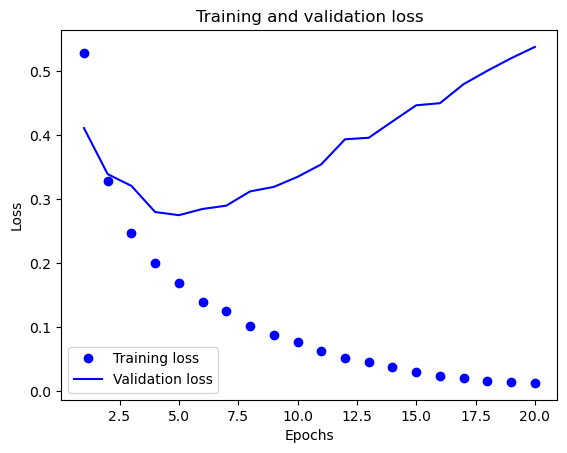

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

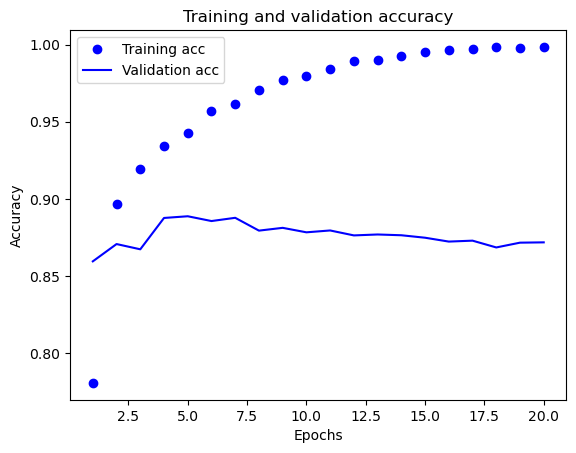

In [15]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/20
49/49 [==============================] - 2s 12ms/step - loss: 0.4594 - accuracy: 0.8107
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2730 - accuracy: 0.9039
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2126 - accuracy: 0.9253
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1816 - accuracy: 0.9349
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1586 - accuracy: 0.9443
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1404 - accuracy: 0.9511
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1268 - accuracy: 0.9549
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1138 - accuracy: 0.9613
Epoch 9/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1002 - accuracy: 0.9669
Epoch 10/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0909 - accuracy: 0.9700
Epoch 11/

In [25]:
results ## 아주 단순한 방식으로도 87%의 정확도를 달성

[0.7418556809425354, 0.8423200249671936]

In [26]:
model = models.Sequential() #은닉층 추가
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 13ms/step - loss: 0.4710 - accuracy: 0.7970
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2607 - accuracy: 0.9035
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.9238
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1713 - accuracy: 0.9376
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1488 - accuracy: 0.9466
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1312 - accuracy: 0.9541
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1108 - accuracy: 0.9623
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0958 - accuracy: 0.9679
Epoch 9/20
49/49 [==============================] - 1s 15ms/step - loss: 0.0850 - accuracy: 0.9716
Epoch 10/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0719 - accuracy: 0.9782
Epoch 11/

In [27]:
model = models.Sequential() #유닛수 32로 증가
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 7s 16ms/step - loss: 0.4612 - accuracy: 0.7954
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2613 - accuracy: 0.9024
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2086 - accuracy: 0.9206
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1761 - accuracy: 0.9328
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1535 - accuracy: 0.9439
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1334 - accuracy: 0.9519
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1098 - accuracy: 0.9614
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0981 - accuracy: 0.9645
Epoch 9/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0819 - accuracy: 0.9722
Epoch 10/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0697 - accuracy: 0.9776
Epoch 11/

In [28]:
model = models.Sequential() #mse 손실함수
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 20ms/step - loss: 0.1547 - accuracy: 0.7862
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0819 - accuracy: 0.8948
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0642 - accuracy: 0.9188
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0542 - accuracy: 0.9320
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.0461 - accuracy: 0.9432
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0412 - accuracy: 0.9488
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0327 - accuracy: 0.9619
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.0293 - accuracy: 0.9656
Epoch 9/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0252 - accuracy: 0.9707
Epoch 10/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0203 - accuracy: 0.9780
Epoch 11/

In [29]:
model = models.Sequential() #유닛수 64개 은닉층
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 5s 33ms/step - loss: 0.1647 - accuracy: 0.7493
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0888 - accuracy: 0.8813
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0691 - accuracy: 0.9109
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0563 - accuracy: 0.9271
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0490 - accuracy: 0.9376
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0414 - accuracy: 0.9478
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0348 - accuracy: 0.9579
Epoch 8/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0296 - accuracy: 0.9641
Epoch 9/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0213 - accuracy: 0.9758
Epoch 10/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0199 - accuracy: 0.9775
Epoch 11/

In [30]:
model = models.Sequential() #유닛수 64개 은닉층
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 3s 29ms/step - loss: 0.1415 - accuracy: 0.7895
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0776 - accuracy: 0.8967
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0646 - accuracy: 0.9146
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0563 - accuracy: 0.9275
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0488 - accuracy: 0.9374
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0428 - accuracy: 0.9464
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0399 - accuracy: 0.9503
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0362 - accuracy: 0.9555
Epoch 9/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0333 - accuracy: 0.9606
Epoch 10/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0315 - accuracy: 0.9630
Epoch 11/

In [21]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.09223256],
       [0.99848515],
       [0.5864036 ],
       ...,
       [0.06704091],
       [0.04799628],
       [0.26579636]], dtype=float32)